IMPORT MODULES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.preprocessing import StandardScaler

loading and visualizing data

In [2]:
data = pd.read_csv('diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


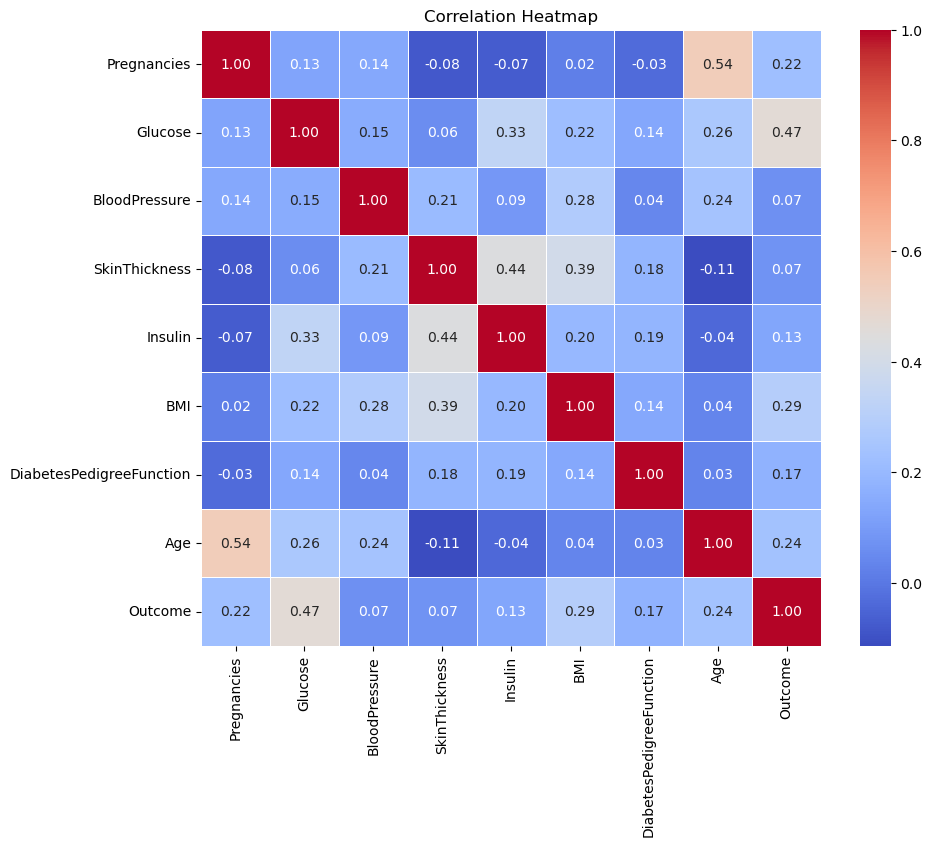

In [5]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


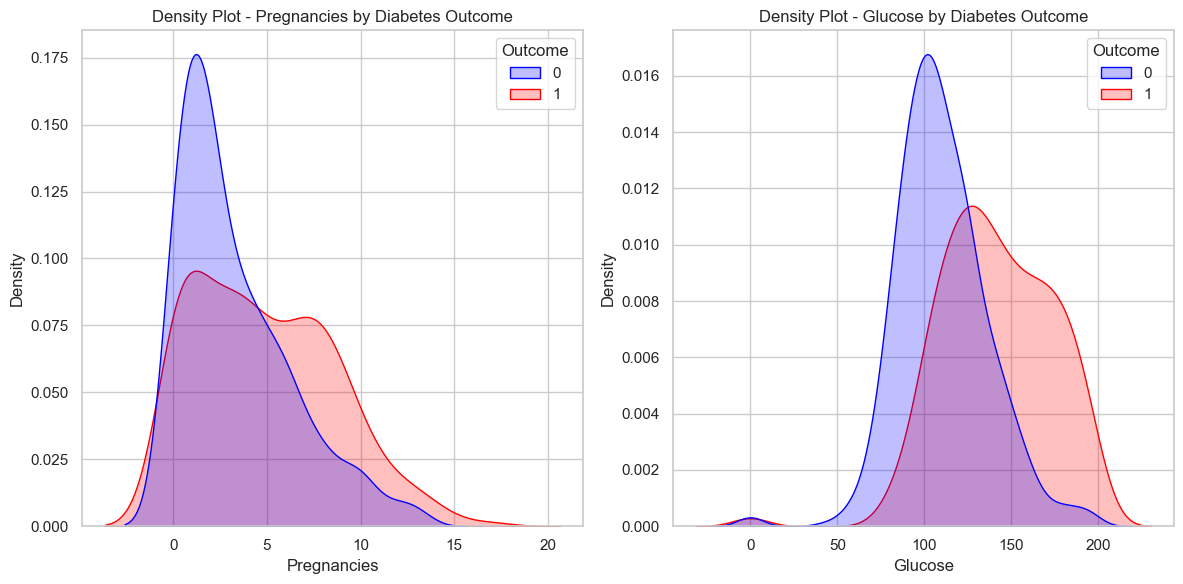

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=data, x='Pregnancies', hue='Outcome', fill=True, common_norm=False, palette={0: 'blue', 1: 'red'})
plt.title('Density Plot - Pregnancies by Diabetes Outcome')
plt.xlabel('Pregnancies')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.kdeplot(data=data, x='Glucose', hue='Outcome', fill=True, common_norm=False, palette={0: 'blue', 1: 'red'})
plt.title('Density Plot - Glucose by Diabetes Outcome')
plt.xlabel('Glucose')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


preprocess data

In [7]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].median())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].median())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].median())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

train data and test data

In [8]:
X = data.drop(['Outcome'],axis=1)

y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


Training model

In [9]:
train_log = []
test_log = []

In [10]:
for neighbours in range(1,15):
    model = knn(neighbours)
    model.fit(X_train,y_train)
    train_log.append(model.score(X_train,y_train))
    test_log.append(model.score(X_test,y_test))

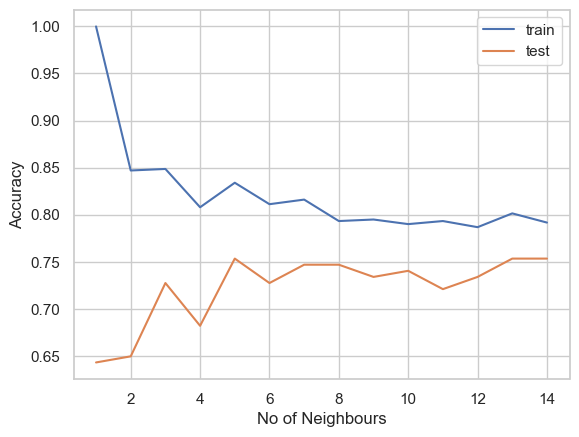

In [11]:
plt.plot(range(1,15),train_log,label='train')
plt.plot(range(1,15),test_log,label='test')
plt.xlabel('No of Neighbours')
plt.ylabel('Accuracy')
plt.legend()

In [12]:
# as we see the test accuracy in case of 12 is higher so we take 12 neighbours
model = knn(12)
model.fit(X_train,y_train)
print(f' train accuracy : {int(model.score(X_train,y_train)*10000)/100}% \n test accuracy : {int(model.score(X_test,y_test)*10000)/100}%')

 train accuracy : 78.66% 
 test accuracy : 73.37%


In [13]:
model2 = dtc(random_state = 0,max_depth = 5)
model2.fit(X_train,y_train)
print(f' train accuracy : {int(model2.score(X_train,y_train)*10000)/100}% \n test accuracy : {int(model2.score(X_test,y_test)*10000)/100}%')

 train accuracy : 83.06% 
 test accuracy : 79.87%


In [14]:
model3 = mlp(random_state = 40)
model3.fit(X_train,y_train)
print(f' train accuracy : {int(model3.score(X_train,y_train)*10000)/100}% \n test accuracy : {int(model3.score(X_test,y_test)*10000)/100}%')

 train accuracy : 81.75% 
 test accuracy : 75.97%


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
